## Oceanbolt Python SDK - Ballast Supramaxes in Indian Ocean Last 30 days

Example of Oceanbolt's Python SDK to answer the question - "How many ballasting Supramaxes were in the Indian Ocean in the last 30 days?" 


In [27]:
# Import the relevant libraries
# In order to get a timeseries of ballasting Supramaxes in the Indian Ocean, we use the TonnageZoneTimeseries client (https://python-sdk.oceanbolt.com/tonnage_v3/zone_count.html)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.tonnage import TonnageZoneTimeseries
from datetime import date

In [18]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [19]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: TonnageZoneTimeseries
tonnage_zone_client = TonnageZoneTimeseries(base_client)

In [20]:
# We apply filters to our query to get the time series of ballasting Supramax vessels
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tonnage_v3/zone_count.html#arguments

df = tonnage_zone_client.get(
    segment=['supramax'], 
    laden_status=["ballast"],
    zone_id=[22, 13, 97, 96, 8], #Zone Ids can be obtained from the zone selector map in the Oceanbolt App (https://app.oceanbolt.com/tonnage-zone-map) or from the entities/zones endpoint.
    last_n_days= 30, #We select trailing 30 days.  
)

#Print 2 first rows of table
df.head(2) 

,date,vessel_count,vessel_dwt
0,2021-01-23,178,10253150.0
1,2021-01-24,185,10665384.0


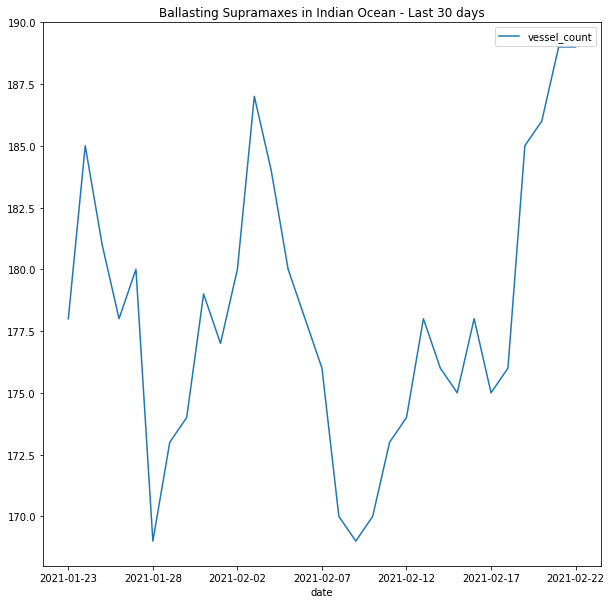

In [32]:
#Let's plot the timeseries
df.plot(x='date',y='vessel_count', figsize=(10,10), title='Ballasting Supramaxes in Indian Ocean - Last 30 days');